In [68]:
import numpy as np
import matplotlib.pyplot as plt

## Import Files From Simulation:

## Our Approach to Calculating Percolation Paths Through a Polymer Membrane:

### Defining The System:

In our system we have random copolymers with solvent molecules. Polymers are represented by beads of types 1 and 2 and solvent molecules are individual beads of type 0. No bead can overlap another. 

### Defining Percolation:

A percolation is a pathway through the polymer network that solvent molecules can move through. To form a percolation a solvent molecule will need to have at least one other solvent molecule adjacent to it within some path radius $r$

### What are we trying to learn from the system:

The goal in developing this code is to determine quantitatively the amount of percolation in a membrane. 

### Models for Percolation:
**1. Fire Spread Model:** In this model we measure the percolation paths by tracing the spots where the solvent molecules continue to be adjacent to the previous... It's easier to explain with a picture

## What we need to calculate:

Starting with the final equilibrium state we have x,y,z postion of a bead and it's identity (and also methylation state). We want to calculate percolation paths which will be represented by root mean square. 

#### What Percolation Model do we want to use:

1. Fire spead model:

Proceedure:
1. Pick a bead type
2. pick a random bead of that bead type
3. Check surround bead types to see if they are the same
    a. Pick a radius to search in
    b. 

In [87]:
def generate_test_data(length=10,width=10,height=10,datapoints=500):
    X = np.random.random(datapoints)*length
    Y = np.random.random(datapoints)*width
    Z = np.random.random(datapoints)*height
    Beads = np.random.randint(3,size=(datapoints)).astype('uint8')
    Beads
    return X,Y,Z,Beads

#generate_test_data()

In [88]:
class Bead:
    
    def __init__(self,x,y,z,bead_type):
        pass

In [196]:
class PolymerNetwork():
    """
    This represents the postions of bead and their type (time invariant)
    
    Parameters
    ----------
    X : float [array] X 
    """
    
    
    def __init__(self,X,Y,Z,Beads):
        self.X = X
        self.Y = Y
        self.Z = Z
        self.Beads = Beads
        
        self.density = Beads.shape[0]/((max(X)-min(X)) * (max(Y)-min(Y)) * (max(Z)-min(Z)))
        
    def visualize(self):
        fig = plt.figure()
        ax = plt.axes(projection='3d')
        ax.scatter3D(self.X[Beads==0], self.Y[Beads==0], self.Z[Beads==0],color='y')
        ax.scatter3D(self.X[Beads==1], self.Y[Beads==1], self.Z[Beads==1],color='r')
        ax.scatter3D(self.X[Beads==2], self.Y[Beads==2], self.Z[Beads==2],color='b')
        
    def nearest_neighbor(self,bead_num,radius):
        '''
        Find the average number of beads that surround a bead of the same type within the radius specified
        '''
        X_bead = self.X[Beads==bead_num]
        Y_bead = self.Y[Beads==bead_num]
        Z_bead = self.Z[Beads==bead_num]
        
        total_neighbors = 0
        for i in range(Beads[Beads==bead_num].shape[0]):
            point = np.array([X_bead[i],Y_bead[i],Z_bead[i]])
            displacement = np.sqrt((X_bead - point[0])**2 + (Y_bead - point[1])**2 + (Z_bead - point[2])**2)
            num_neighbor_points = displacement[displacement<=radius].shape[0] -1
            
            total_neighbors += num_neighbor_points

        return total_neighbors/(i+1)

In [197]:
X,Y,Z,Beads = generate_test_data()
PNet_Test = PolymerNetwork(X,Y,Z,Beads)

PNet_Test.density

0.5100347662303937

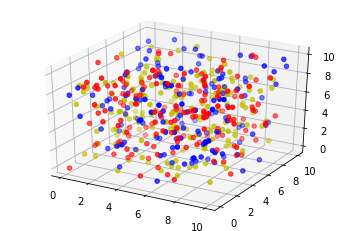

In [198]:
PNet_Test.visualize()

In [201]:
PNet_Test.nearest_neighbor(bead_num=0,radius=0.4)

0.022857142857142857

Text(0, 0.5, 'Average Number of Neighbor Points')

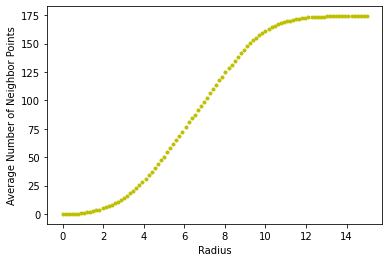

In [207]:
radii = np.linspace(0,15,100)
for r in radii:
    plt.plot(r,PNet_Test.nearest_neighbor(bead_num=0,radius=r),'y.')
plt.xlabel('Radius')
plt.ylabel('Average Number of Neighbor Points')